In [1]:
from sevnpy.sevn import SEVNmanager,sevnwrap,Star
from sevnpy.io import readlogstring
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as const
import astropy.units as u
import os 
import calclib as cl        # custom library with routines for tides, etc.
import plotlib as pl        # custom library with functions for plots

# stellar table paths
path_tables = '/home/erika/Scrivania/uni/1-2dott/paper/GallegosGarciaLike/analysis/popsynth-comparison/sevn_25ago/sevn/tables/'
parsec_ov05 = path_tables + 'SEVNtracks_parsec_ov05_AGB'

In [2]:
path_plots = './v_sevn_25ago/plot_single'
os.makedirs(path_plots, exist_ok=True)

In [3]:
# function similar to dadt_lines inside plotlib.py
def dadt_contributions(dfP, xmin, xmax, ymin,ymax):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 20,
    "axes.labelsize" : 20,
    "xtick.labelsize" : 20,
    "ytick.labelsize" : 20,
    "legend.fontsize": 20
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
    RLOexpstart = dfP.loc[(dfP['dadtRLO'] > 0)][['Worldtime','Mass_0','Mass_1']].iloc[0]

    # Semimajor variations da/dt
    fig = plt.figure(figsize=(10,8))
    plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')
    plt.plot(dfP['Worldtime'],-dfP['dSemimajordt'].mask(dfP['dSemimajordt'] > 0), lw=10, color='navy',  label=r'Total (-)')
    plt.plot(dfP['Worldtime'], dfP['dadtTides'].mask(dfP['dadtTides'] < 0), lw=5, color='gold', linestyle='dashed', label=r'Tides (+)')
    plt.plot(dfP['Worldtime'],-dfP['dadtTides'].mask(dfP['dadtTides'] > 0), lw=5, color='salmon', linestyle='dashed', label=r'Tides (-)')
    plt.plot(dfP['Worldtime'],dfP['dadtRLO'].mask(dfP['dadtRLO'] < 0), lw=3, linestyle='dashdot', color='darkred',  label=r'RLO (+)')
    plt.plot(dfP['Worldtime'],-dfP['dadtRLO'].mask(dfP['dadtRLO'] > 0), lw=3, linestyle='dashdot', color='fuchsia',  label=r'RLO (-)')
    plt.plot(dfP['Worldtime'],dfP['dadtWinds'], color='indigo', lw=2,  label=r'Winds (+)')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', label='RLO start',zorder=1)
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', label='RLO end',zorder=1)
    plt.axvline(x=RLOexpstart['Worldtime'], linestyle='dashed',color='k', label=r'M$_{\rm BH} \geq$'+f'{RLOexpstart['Mass_1']/RLOexpstart['Mass_0']:.2f}'+r' M$_{\rm star}$',zorder=1)
    #plt.axvline(x=massratiorevtsh, linestyle='solid',color='k', label=r'M$_{\rm BH} \geq$ k ~M$_{\rm star}$',zorder=1)

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.legend(loc='lower left', ncols=2)
    plt.yscale('log')
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'$|$da$|$/dt  [R$_\odot$ / Myr ]')
    plt.show()
    return fig



def dadt_contributions_circ(dfP, xmin, xmax, ymin,ymax):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 20,
    "axes.labelsize" : 20,
    "xtick.labelsize" : 20,
    "ytick.labelsize" : 20,
    "legend.fontsize": 20
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
    #RLOexpstart = dfP.loc[(dfP['dadtRLO'] > 0)][['Worldtime','Mass_0','Mass_1']].iloc[0]

    # Semimajor variations da/dt
    fig = plt.figure(figsize=(10,8))
    plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')
    plt.plot(dfP['Worldtime'],-dfP['dSemimajordt'].mask(dfP['dSemimajordt'] > 0), lw=10, color='navy',  label=r'Total (-)')
    plt.plot(dfP['Worldtime'], dfP['dadtTides'].mask(dfP['dadtTides'] < 0), lw=5, color='gold', linestyle='dashed', label=r'Tides (+)')
    plt.plot(dfP['Worldtime'],-dfP['dadtTides'].mask(dfP['dadtTides'] > 0), lw=5, color='salmon', linestyle='dashed', label=r'Tides (-)')
    plt.plot(dfP['Worldtime'],dfP['dadtRLO'].mask(dfP['dadtRLO'] < 0), lw=3, linestyle='dashdot', color='darkred',  label=r'RLO (+)')
    plt.plot(dfP['Worldtime'],-dfP['dadtRLO'].mask(dfP['dadtRLO'] > 0), lw=3, linestyle='dashdot', color='fuchsia',  label=r'RLO (-)')
    plt.plot(dfP['Worldtime'],dfP['dadtWinds'], color='indigo', lw=2,  label=r'Winds (+)')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', label='RLO start',zorder=1)
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', label='RLO end',zorder=1)
    #plt.axvline(x=RLOexpstart['Worldtime'], linestyle='dashed',color='k', label=r'M$_{\rm BH} \geq$'+f'{RLOexpstart['Mass_1']/RLOexpstart['Mass_0']:.2f}'+r' M$_{\rm star}$',zorder=1)
    #plt.axvline(x=massratiorevtsh, linestyle='solid',color='k', label=r'M$_{\rm BH} \geq$ k ~M$_{\rm star}$',zorder=1)

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.legend(loc='lower left', ncols=2)
    plt.yscale('log')
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'$|$da$|$/dt  [R$_\odot$ / Myr ]')
    plt.show()
    return fig



def omega_evo(dfP, xmin, xmax, ymin,ymax):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 20,
    "axes.labelsize" : 20,
    "xtick.labelsize" : 20,
    "ytick.labelsize" : 20,
    "legend.fontsize": 20
    })
    


    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]

    omega_crit_RL = cl.OmegaCritFromRadius(dfP['Mass_0'],dfP['Radius_eff'])
    omega_crit = cl.OmegaCrit(dfP)
    omega_orb = cl.OmegaOrb(dfP)

    # Angular velocity
    fig = plt.figure(figsize=(10,8))
    plt.plot(dfP['Worldtime'], omega_orb,  color='navy', linestyle='dashed', lw=3,  label=r'$\Omega_{\rm orb}$')
    plt.plot(dfP['Worldtime'], dfP['OmegaSpin_0'], color='dodgerblue', lw=3, linestyle='solid', label=r'$\Omega_{\rm star}$')
    plt.plot(dfP['Worldtime'], omega_crit_RL,  color='mediumpurple', linestyle='dashdot', lw=3, label=r'$\Omega_{\rm star, crit} ~(R_{\rm eff})$')
    plt.plot(dfP['Worldtime'], omega_crit, color='r', linestyle='dotted', lw=3,label=r'$\Omega_{\rm star, crit}~ (R_{\rm star})$ ')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', label='RLO start',zorder=1)
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', label='RLO end',zorder=1)

    #plt.scatter(dfP['Worldtime'],- (dadt_tides*1e6*dt_timestep + DA) , color='dodgerblue', s=10, label=r'- $\Delta a (RLO+tides)$')
    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.legend(loc='lower right', ncols=3)
    plt.yscale('log')
    plt.xlabel('Time [Myr]')
    plt.ylabel(r' Angular velocity  [ 1/ yr ]')
    plt.show()
    return fig





def plot_Jvariations(dfP, rlo_gamma_angmom, ymin, ymax, supercrit=False, inertiax_scaling=True, Reff=False, tides=True):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 20,
    "axes.labelsize" : 20,
    "xtick.labelsize" : 20,
    "ytick.labelsize" : 20,
    "legend.fontsize": 14
    })


    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
    dt_timestep = dfP['Worldtime'].diff().shift(-1)  # timestep used, in Myr

    # absolute dJ over the total timestep [converted from Myr to yr]
    if Reff == False:
        domegastar = cl.domegastar_tides(dfP, Reff=False)   #domega/yr i.e. yr^-2
    else:
        domegastar = cl.domegastar_tides(dfP, Reff=True)   #domega/yr i.e. yr^-2
    
    # use or not the scaling, as in the typo of 7 lug commit
    if inertiax_scaling==True:  
        dJspin_tides = domegastar*1e6*dt_timestep*cl.Inertia_eff(dfP)  # Msun Rsun^2 yr^-1
    else:
        dJspin_tides = domegastar*1e6*dt_timestep*dfP['Inertia_0']  # Msun Rsun^2 yr^-1
    
    # Jorb_variations_RLO are in units of timestep in Myr
    # i.e. # Msun Rsun^2 yr^-1 in single timpestep in Myr
    DJorb_lost, DJorb_donor, DJorb_acc,Jorb_new, DA = cl.Jorb_variations_RLO(dfP, rlo_gamma_angmom) # discrete variations in single timestep in Myr
    DJRLO = DJorb_lost+DJorb_donor+DJorb_acc          # total due to RLO stream/losses alone   
    DJorbtot = dfP['AngMom'].diff().shift(-1)      # total of binary, from outputs

    # angular momentum of the star lost for stellar winds and magnetic braking
    # stellar wind loss as in Eq. 9 of Iorio+2023 (following Hurley+02)
    # note: here dMdt is in Msun / Myr so it has to be converted in yrs for consistency
    dJwinddt = 0.6666666666666666*dfP['Radius_0']*dfP['Radius_0']*dfP['dMdt_0']*1e-6*dfP['OmegaSpin_0']  # Msun Rsun^2 / yr^2
    # magnetic braking in SEVN is calculated in property.cpp according to Eq. 10 of Iorio+23 (following Hurley+02)
    # WARNING: As stated also in SEVN, here and there the envelope size is used
    # but only the convective envelope should be used, not on all the envelope
    # here we keep all the envelope for consistency with SEVN
    # also note that in Iorio+23 there is a typo, while eq. 50 of HUrley+02 is correct i.e. (R*omega)^3 is the correct formula
    Menv = np.select([(dfP.MHE_0 !=0), (dfP.MHE_0 == 0)], 
                     [dfP['Mass_0']-dfP['MHE_0'], 0.0], default=np.nan) 
    dJbrakdt = - 5.83e-16*(dfP['OmegaSpin_0']*dfP['Radius_0'])**3*Menv / dfP['Mass_0']   # Msun*Rsun^2 / yr^2

    # calculate time derivatives removing the last timestep and converting it from Myr toin yr
    # so that all time derivatives are in Msun Rsun^2 yr^-2
    dt_yr = dt_timestep[:-1]*1e-6
    DJRLOdt = DJRLO[:-1]/dt_yr
    DJorbtotdt = DJorbtot[:-1]/dt_yr
    DJorb_donordt = DJorb_donor[:-1]/dt_yr
    dJspin_tidesdt = dJspin_tides[:-1]/dt_yr
    DJorb_lostdt = DJorb_lost[:-1]/dt_yr
    DJorb_accdt = DJorb_acc[:-1]/dt_yr


    # Jstar 
    DJstar_tot = dfP['AngMomSpin_0'].diff().shift(-1)                   # Msun Rsun^2 yr^-1 in single timestep in Myr
    dJstar_totdt = DJstar_tot[:-1]/dt_yr                                # Msun Rsun^2 yr^-2









    # d J Orbital angular momentum /dt
    
    figDJorb = plt.figure(figsize=(10,8))

    #plt.plot(dfP['Worldtime'].mask(DJorbtot <  1e-2).dropna()[:-1], DJorbtot.mask(DJorbtot <  1e-2).dropna(), color='mediumpurple', lw=6, label=r'Total (+)')
    plt.plot(dfP['Worldtime'][:-1], - DJorbtotdt.mask(DJorbtotdt> 0), color='k', lw=10, label=r'Total (-)')         
    if supercrit == True:
        plt.plot(dfP['Worldtime'][:-1], DJorbtotdt.mask(DJorbtotdt< 0), lw=10, color='lightgrey',  label=r'Total (+)')
    if tides==True:
        plt.plot(dfP['Worldtime'][:-1], abs(dJspin_tidesdt-DJRLOdt), color='cyan', lw=3, linestyle='dotted', label=r'$|$ Tides + RLO $|$')
    plt.plot(dfP['Worldtime'][:-1], - DJRLOdt.mask(DJRLOdt > 0), lw=6, color='firebrick',  label=r'RLO: total (-)')    
    if supercrit == True:
        plt.plot(dfP['Worldtime'][:-1], DJRLOdt.mask(DJRLOdt < 0), lw=6, color='orange',  label=r'RLO: total (+)') 
    if tides==True:
        plt.plot(dfP['Worldtime'][:-1], dJspin_tidesdt.mask(dJspin_tidesdt < 0), lw=5, linestyle='dashed', color='dodgerblue',  label=r'Tides: lost to spin-up star (-)') 
        if supercrit == True:
            plt.plot(dfP['Worldtime'][:-1], -dJspin_tidesdt.mask(dJspin_tidesdt > 0), lw=5, linestyle='dashed', color='lightskyblue',  label=r'Tides: gained from star spin-down (+)') 
    plt.plot(dfP['Worldtime'][:-1], - DJorb_lostdt, color='gold', linestyle='dashdot', lw=4, label=r'RLO: mass lost from system (-)')
    plt.plot(dfP['Worldtime'][:-1], DJorb_donordt, color='r', linestyle='dashdot', lw=3, label=r'RLO: gained from donor (+)')    
    #plt.plot(dfP['Worldtime'][:-1], -DJorb_accdt, color='orange', linestyle='solid', lw=3, label=r'RLO: lost to BH accretion (-)')
 
    #plt.plot(dfP['Worldtime'].mask(DJRLOtides > - 1e1).dropna()[:-1], - DJRLOtides.mask(DJRLOtides > - 1e1).dropna(), lw=2, color='cyan',  label=r'RLO+tides: total (-)') 
    #plt.axvline(x=RLOstarttime, linestyle='dotted',color='k',  label='RLO start')
    #plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', label='RLO end',zorder=1)
    plt.xlim(xmin=RLOstarttime,xmax=RLOendtime)
    plt.ylim(ymin=1e10, ymax=1e18)
    plt.legend(loc='lower left', ncols=2)
    plt.yscale('log')
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'$|$dJ$_{\rm orb}$$|$/dt [ M$_\odot$ R$_\odot^2$ yr$^{-2}$]')
    plt.show()
    






    # dJ star /dt
    # mask to avoid discontinuities due to the log scale
    figdJstar = plt.figure(figsize=(10,8))
    plt.plot(dfP['Worldtime'][:-1],dJstar_totdt.mask(dJstar_totdt < 0), lw=10, color='k',  label=r'Total spin-up (applied)')
    plt.plot(dfP['Worldtime'][:-1],-dJstar_totdt.mask(dJstar_totdt > 0), lw=10, color='lightgrey',  label=r'Total spin-down (applied)')
    if tides==True:
        plt.plot(dfP['Worldtime'][:-1],dJspin_tidesdt.mask(dJspin_tidesdt < 0), color='dodgerblue', lw=5, linestyle='dashed',  label=r'Tidal spin-up')
        if supercrit == True:
            plt.plot(dfP['Worldtime'][:-1],-dJspin_tidesdt.mask(dJspin_tidesdt > 0), color='lightskyblue', lw=5, linestyle='dashed',  label=r'Tidal spin-down')
    #plt.plot(dfP['Worldtime'][:-1],-dJspin_tidesdt, color='lightskyblue',  label=r'Tides (-)') 
    plt.plot(dfP['Worldtime'][:-1],DJorb_donordt, color='r', lw=3, linestyle='dashdot',  label=r'RLO spin-down')
    if tides==True:
        plt.plot(dfP['Worldtime'][:-1], abs(dJspin_tidesdt+ (-DJorb_donordt)), color='cyan', lw=2, linestyle='dashdot', label=r'$|$ Tides + RLO $|$ (expected)')
    #plt.plot(dfP['Worldtime'], -dJwinddt, lw=3, color='forestgreen', linestyle='dashdot',  label=r'Wind loss')
    #plt.plot(dfP['Worldtime'], -dJbrakdt, lw=3, color='limegreen', linestyle='dashed',  label=r'Magnetic braking')
    #plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', label='RLO start')
    plt.xlim(xmin=RLOstarttime,xmax=RLOendtime)
    #plt.ylim(ymin=1e9, ymax=1e18)
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.legend(loc='lower left', ncols=2)
    plt.yscale('log')
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'$|$dJ$_{\rm star}$$|$/dt [ M$_\odot$ R$_\odot^2$ yr$^{-2}$]')
    plt.show()


    
    # Jcrit
    omegacritstar = cl.OmegaCrit(dfP)
    DeltaMaxOmegaCrit = omegacritstar - dfP['OmegaSpin_0']   # max allowed increase of omega star
    DJstarcrit_star = dfP['Inertia_0']*omegacritstar
    DeltaMaxJstarcrit_star = dfP['Inertia_0']*DeltaMaxOmegaCrit

    DJstarcrit_eff = cl.Inertia_eff(dfP)*cl.OmegaCritFromRadius(dfP['Mass_0'], dfP['Radius_eff'])


    figJcrit = plt.figure(figsize=(10,8))
    plt.plot(dfP['Worldtime'],dfP['AngMomSpin_0'], lw=10, color='k',  label=r'J$_{\rm star}$')
    plt.plot(dfP['Worldtime'],DJstarcrit_star, lw=5, color='r',  label=r'J$_{\rm crit, star}$ (R = R$_{\rm star}$)')
    plt.plot(dfP['Worldtime'],DeltaMaxJstarcrit_star, color='darkred', linestyle='dashdot', lw=3, label=r'J$_{\rm crit, star}$ - J$_{\rm star}$')
    plt.plot(dfP['Worldtime'],DJstarcrit_eff, lw=5, color='mediumpurple', linestyle='dashed', label=r'J$_{\rm crit, eff}$ (R = R$_{\rm eff}$)')
    plt.plot(dfP['Worldtime'],DJstarcrit_eff-dfP['AngMomSpin_0'], color='indigo', linestyle='dashed', lw=3, label=r'J$_{\rm crit, eff}$ - J$_{\rm star}$')
    plt.plot(dfP['Worldtime'],abs(dJspin_tides), color='dodgerblue', linestyle='dotted', lw=3, label=r'$|$J$_{\rm tidal~spin-up, star}|$ (expected)')
    #plt.plot(dfP['Worldtime'][:-1],dJspin_tidesdt, color='cyan', lw=5, linestyle='dashed',  label=r'Tidal spin-up')
    #plt.plot(dfP['Worldtime'][:-1],-dJspin_tidesdt, color='lightskyblue',  label=r'Tides (-)') 
    #plt.plot(dfP['Worldtime'][:-1],DJorb_donordt, color='limegreen', lw=3, linestyle='dotted',  label=r'RLO spin-down')
    #plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', label='RLO start')
    plt.xlim(xmin=RLOstarttime,xmax=RLOendtime)
    plt.ylim(ymin=1e4, ymax=1e8)
    plt.legend(loc='upper left', ncols=2)
    plt.yscale('log')
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'J [ M$_\odot$ R$_\odot^2$ yr$^{-2}$]')
    plt.show()

    return figDJorb,figdJstar,figJcrit


def semimajor(dfP,xmin,xmax,ymin,ymax):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 17,
    "axes.labelsize" : 17,
    "xtick.labelsize" : 17,
    "ytick.labelsize" : 17,
    "legend.fontsize": 15
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
        
    fig = plt.figure(figsize=(8,6))
    plt.scatter(dfP['Worldtime'],dfP['Semimajor'], color='dodgerblue')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', alpha=0.5, label='RLO start')
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', alpha=0.5, label='RLO end')

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin,ymax=ymax)
    plt.yscale('log')
    plt.legend(loc='lower left', ncols=2)
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'Semi-major axis [R$_\odot$]')
    plt.show()
    return fig

def semimajor_compare(dfP, dfP2,xmin,xmax,ymin,ymax, label, label2):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 17,
    "axes.labelsize" : 17,
    "xtick.labelsize" : 17,
    "ytick.labelsize" : 17,
    "legend.fontsize": 15
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
    RLOstarttime2 = dfP2.loc[dfP2['Radius_0'] >= dfP2['RL0']].Worldtime.values[0]
    RLOendtime2 = dfP2.loc[dfP2['Radius_0'] >= dfP2['RL0']].Worldtime.values[-1]
        
    fig = plt.figure(figsize=(8,6))
    plt.plot(dfP['Worldtime'],dfP['Semimajor'], color='dodgerblue', lw=4, label=label)
    plt.plot(dfP2['Worldtime'],dfP2['Semimajor'], color='darkorange', lw=4, label=label2)
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', alpha=0.5, label=f'RLO start, {label}')
    plt.axvline(x=RLOstarttime2, linestyle='solid',color='k', alpha=0.5, label=f'RLO start, {label2}')
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', alpha=0.5, label=f'RLO end, {label}')    
    plt.axvline(x=RLOendtime2, linestyle='dashed',color='k', alpha=0.5, label=f'RLO end, {label2}')

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin,ymax=ymax)
    plt.yscale('log')
    plt.legend(loc='lower left', ncols=2)
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'Semi-major axis [R$_\odot$]')
    plt.show()
    return fig

def mass_donor_compare(dfP, dfP2,xmin,xmax,ymin,ymax, label, label2):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 17,
    "axes.labelsize" : 17,
    "xtick.labelsize" : 17,
    "ytick.labelsize" : 17,
    "legend.fontsize": 15
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
    RLOstarttime2 = dfP2.loc[dfP2['Radius_0'] >= dfP2['RL0']].Worldtime.values[0]
    RLOendtime2 = dfP2.loc[dfP2['Radius_0'] >= dfP2['RL0']].Worldtime.values[-1]
        
    fig = plt.figure(figsize=(8,6))
    plt.plot(dfP['Worldtime'],dfP['Mass_0'], color='dodgerblue', lw=4, label=f'Star, {label}')
    plt.plot(dfP2['Worldtime'],dfP2['Mass_0'], color='darkorange', lw=4, label=f'Star, {label2}')
    plt.plot(dfP['Worldtime'],dfP['MHE_0'], color='r', linestyle='dashed', lw=2, label=f'He core, {label}')
    plt.plot(dfP2['Worldtime'],dfP2['MHE_0'], color='darkred', linestyle='dotted', lw=2, label=f'He core, {label2}')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', alpha=0.5, label=f'RLO start, {label}')
    plt.axvline(x=RLOstarttime2, linestyle='solid',color='k', alpha=0.5, label=f'RLO start, {label2}')
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', alpha=0.5, label=f'RLO end, {label}')    
    plt.axvline(x=RLOendtime2, linestyle='dashed',color='k', alpha=0.5, label=f'RLO end, {label2}')

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin,ymax=ymax)
    plt.legend(loc='lower left', ncols=2)
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'Mass donor [M$_\odot$]')
    plt.show()
    return fig


def radius_donor_compare(dfP, dfP2,xmin,xmax,ymin,ymax, label, label2):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 17,
    "axes.labelsize" : 17,
    "xtick.labelsize" : 17,
    "ytick.labelsize" : 17,
    "legend.fontsize": 15
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
    RLOstarttime2 = dfP2.loc[dfP2['Radius_0'] >= dfP2['RL0']].Worldtime.values[0]
    RLOendtime2 = dfP2.loc[dfP2['Radius_0'] >= dfP2['RL0']].Worldtime.values[-1]
        
    fig = plt.figure(figsize=(8,6))
    plt.plot(dfP['Worldtime'],dfP['Radius_0'], color='dodgerblue', lw=4, label=f'Star, {label}')
    plt.plot(dfP2['Worldtime'],dfP2['Radius_0'], color='darkorange', lw=4, label=f'Star, {label2}')
    plt.plot(dfP['Worldtime'],dfP['RHE_0'], color='r', linestyle='dashed', lw=2, label=f'He core, {label}')
    plt.plot(dfP2['Worldtime'],dfP2['RHE_0'], color='darkred', linestyle='dotted', lw=2, label=f'He core, {label2}')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', alpha=0.5, label=f'RLO start, {label}')
    plt.axvline(x=RLOstarttime2, linestyle='solid',color='k', alpha=0.5, label=f'RLO start, {label2}')
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', alpha=0.5, label=f'RLO end, {label}')    
    plt.axvline(x=RLOendtime2, linestyle='dashed',color='k', alpha=0.5, label=f'RLO end, {label2}')

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin,ymax=ymax)
    plt.yscale('log')
    plt.legend(loc='lower left', ncols=2)
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'Radius donor [R$_\odot$]')
    plt.show()
    return fig





def inertia(dfP,xmin,xmax,ymin,ymax):
    plt.rcParams.update({
    "font.family": "cmr10",   # computer modern font, as in latex
    "font.size": 17,
    "axes.labelsize" : 17,
    "xtick.labelsize" : 17,
    "ytick.labelsize" : 17,
    "legend.fontsize": 15
    })

    RLOstarttime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[0]
    RLOendtime = dfP.loc[dfP['Radius_0'] >= dfP['RL0']].Worldtime.values[-1]
        
    fig = plt.figure(figsize=(8,6))
    plt.plot(dfP['Worldtime'],dfP['Inertia_0'], lw=2, color='dodgerblue', label='Inertia')
    plt.plot(dfP['Worldtime'],cl.Inertia_eff(dfP), lw=2, color='orange', label='Inertia eff')
    plt.axvline(x=RLOstarttime, linestyle='dotted',color='k', alpha=0.5, label='RLO start')
    plt.axvline(x=RLOendtime, linestyle='dashdot',color='k', alpha=0.5, label='RLO end')

    plt.xlim(xmin=xmin,xmax=xmax)
    plt.ylim(ymin=ymin,ymax=ymax)
    plt.yscale('log')
    plt.legend(loc='lower left', ncols=2)
    plt.xlabel('Time [Myr]')
    plt.ylabel(r'Inertia [M$_\odot$ R$_\odot^2$]')
    plt.show()

## Fiducial binaries in the GG+21 setup

In [4]:
dict_fid_isotropic = { "wmode" : "hurley",
                    "tmode" : "simple",              # tides simple    
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": -2.0            # default SEVN i.e. isotropic re-emission from secondary: gamma=(Mdonor*Mdonor)/(Mtot*Mtot)
                     }


dict_fid_Jeans = { "wmode" : "hurley",
                    "tmode" : "simple",              # tides simple    
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": -1.0            # Jeans option i.e. from primary: gamma=(Maccretor*Maccretor)/(Mtot*Mtot)
                     }

dict_fid_circ100 = { "wmode" : "hurley",
                    "tmode" : "simple",              # tides simple    
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": 1.0            # fraction of specific orbital angular momentum lost to the circumbinary disk / as L2 outflow
                     }


dict_fid_circ150 = { "wmode" : "hurley",
                    "tmode" : "simple",              # tides simple
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": 1.50            # fraction of specific orbital angular momentum lost to the circumbinary disk / as L2 outflow
                     }


In [5]:
dict_notid_isotropic = { "wmode" : "hurley",
                    "tmode" : "disabled",              # no tides    
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": -2.0            # default SEVN i.e. isotropic re-emission from secondary: gamma=(Mdonor*Mdonor)/(Mtot*Mtot)
                     }

dict_notid_Jeans = { "wmode" : "hurley",
                    "tmode" : "disabled",              # no tides   
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": -1.0            # Jeans option i.e. from primary: gamma=(Maccretor*Maccretor)/(Mtot*Mtot)
                     }

dict_notid_circ100 = { "wmode" : "hurley",
                    "tmode" : "disabled",              # no tides
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": 1.0            # fraction of specific orbital angular momentum lost to the circumbinary disk / as L2 outflow
                     }

dict_notid_circ150 = { "wmode" : "hurley",
                    "tmode" : "disabled",              # no tides   
                    "rlmode" : "hurley_rl",
                    "circmode" : "periastron",
                    "sn_kicks" : "zeros",
                    "tables": parsec_ov05,
                    "tabuse_envconv":True, 
                    "tabuse_rhe":True,   
                    "tabuse_rco":True,   
                    'tabuse_inertia': False,            # if False uses Hurley+2000 inertia (default)
                    "use_thg_hurley":False,             # True only if convective tables disabled
                    "optimistic_scenario_hg": True,    
                    "rlo_stability": "qcrit_startrack",
                    "eddington_factor": "1",
                    "w_alpha": "1.5",
                    "w_beta": "0.125",
                    "ce_alpha": "1",
                    "star_lambda" : "-2",
                    "ts_check_spin": True,
                    "ts_check_spin_bse": True,
                     "rlo_gamma_angmom": 1.50            # fraction of specific orbital angular momentum lost to the circumbinary disk / as L2 outflow
                     }

## Show action of tides and winds in the fiducial isotropic setup

### Tides vs no tides for: P=10 days, q=0.5, Z=0.00142

In [6]:
m1 = 40                 # Msun, donor mass
Z = 0.00142        # Z of donor
P = 10     
q = 0.5
pl.calc_a(P/365.25, m1, m1*q)

76.46949242576557

In [7]:
dfP_iso, lPdic_iso = pl.run_single(dict_fid_isotropic, m1=40, q=0.5, per=10,Zdonor=0.00142)
print(pl.find_status_single(dfP_iso))

1


In [8]:
dfP_iso_notid, lPdic_iso_notid = pl.run_single(dict_notid_isotropic, m1=40, q=0.5, per=10,Zdonor=0.00142) # 5 days ~ logP~0.7
print(pl.find_status_single(dfP_iso_notid))

0


/tmp/ipykernel_112294/3471096177.py:330: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Semimajor'], color='dodgerblue', lw=4, label=label)


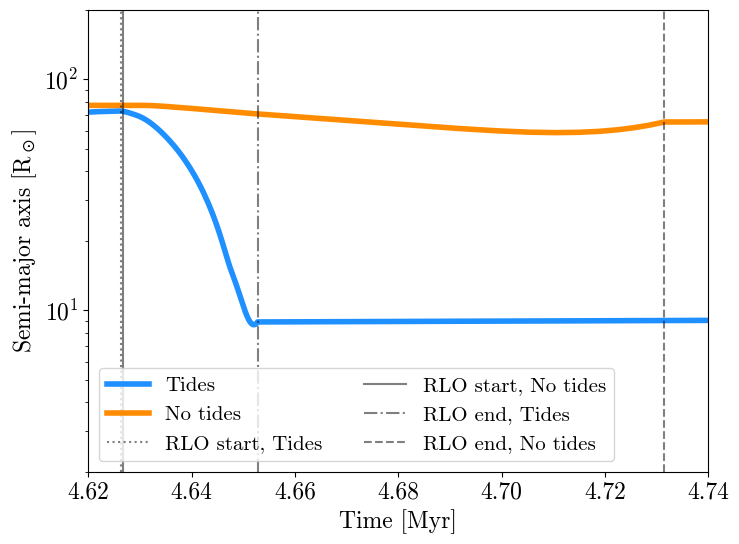

/tmp/ipykernel_112294/3471096177.py:362: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Mass_0'], color='dodgerblue', lw=4, label=f'Star, {label}')


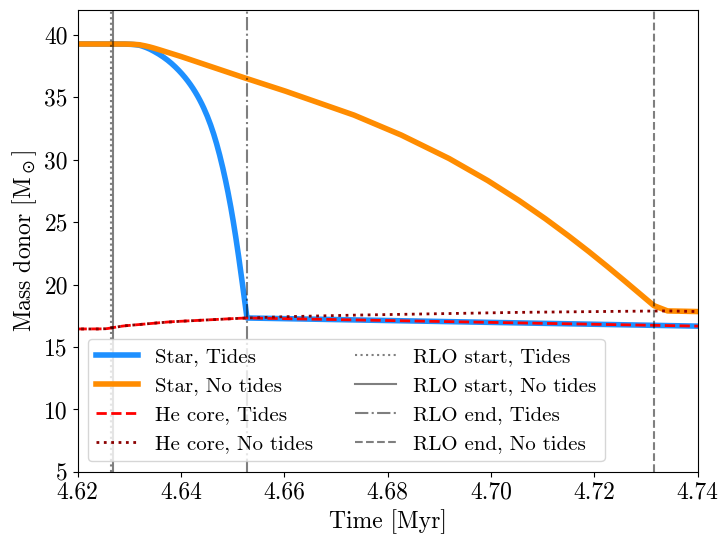

/tmp/ipykernel_112294/3471096177.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')


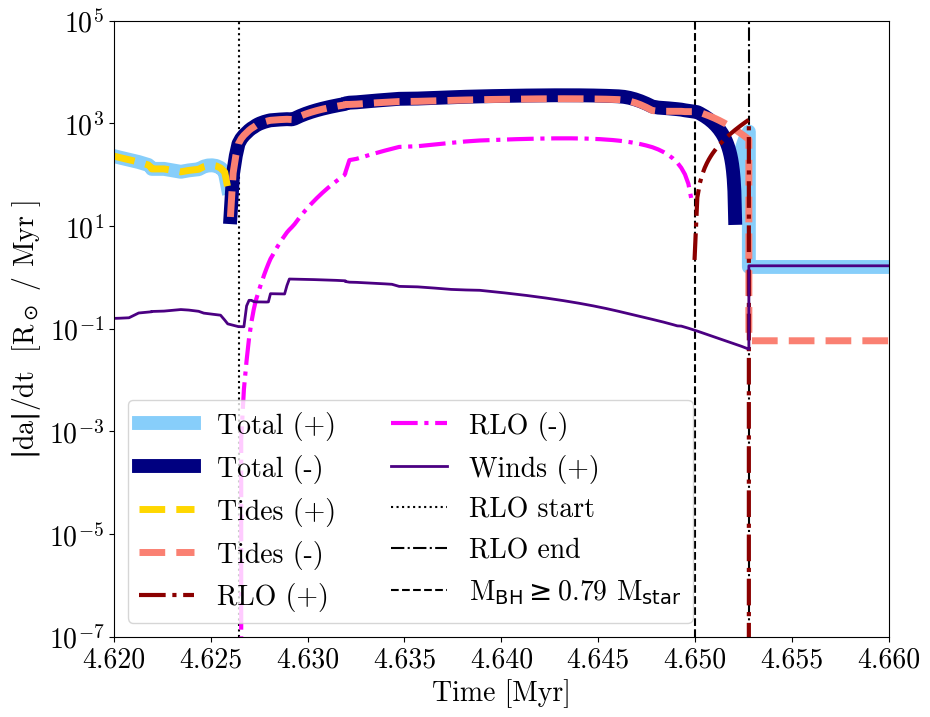

/tmp/ipykernel_112294/3471096177.py:101: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'], omega_orb,  color='navy', linestyle='dashed', lw=3,  label=r'$\Omega_{\rm orb}$')


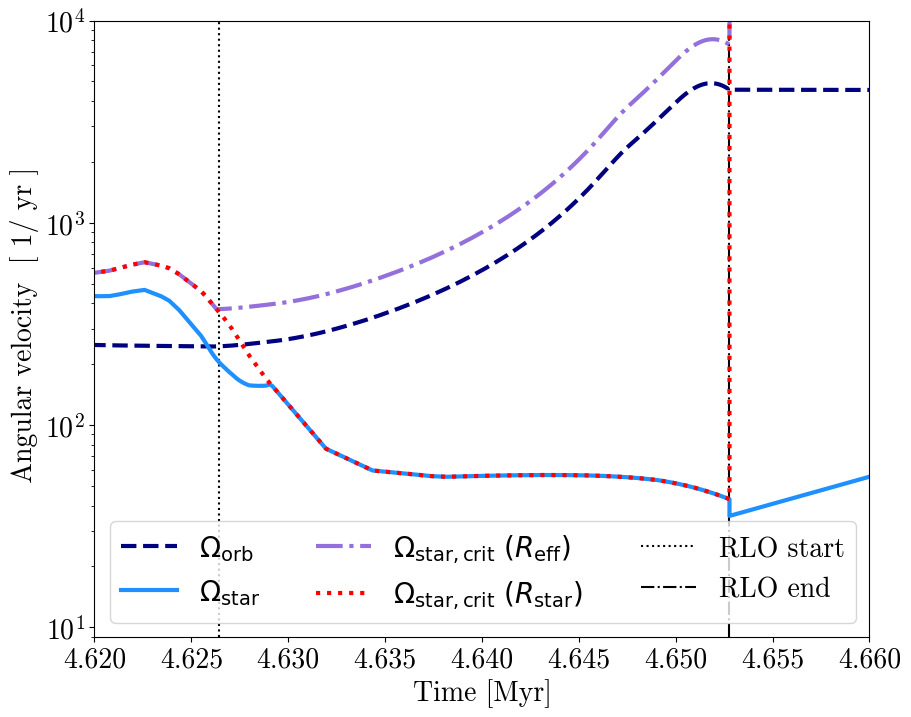

In [9]:
figa = semimajor_compare(dfP_iso, dfP_iso_notid, xmin=4.62, xmax=4.74 , ymin=2,ymax=2e2, label='Tides', label2='No tides')
figM = mass_donor_compare(dfP_iso, dfP_iso_notid, xmin=4.62, xmax=4.74 , ymin=5,ymax=42, label='Tides', label2='No tides')
figdadt = dadt_contributions(dfP_iso, xmin=4.62, xmax=4.66 , ymin=1e-7,ymax=1e5)
figomega = omega_evo(dfP_iso, xmin=4.62, xmax=4.66 , ymin=9,ymax=1e4)

In [10]:
figa.savefig(f'{path_plots}/iso_a_evo.pdf',dpi=300)
figM.savefig(f'{path_plots}/iso_mass_evo.pdf',dpi=300)
figdadt.savefig(f'{path_plots}/iso_dadt.pdf',dpi=300)
figomega.savefig(f'{path_plots}/iso_omega.pdf',dpi=300)

# Winds in the isotropic regime with 
Z=0.00142 vs Z=0.000142, no tides

In [11]:
m1 = 40                 # Msun, donor mass
P = 10**(0.5)     
q = 0.5
pl.calc_a(P/365.25, m1, m1*q)

35.49399421554704

In [12]:
dfP_isonotid_wind, lPdic_isonotid_wind = pl.run_single(dict_notid_isotropic, m1=40, q=0.5, per=10**0.5,Zdonor=0.00142)
print(pl.find_status_single(dfP_isonotid_wind))

0


In [13]:
dfP_isonotid_windZlow, lPdic_isonotid_windZlow = pl.run_single(dict_notid_isotropic, m1=40, q=0.5, per=10**0.5,Zdonor=0.000142)
print(pl.find_status_single(dfP_isonotid_windZlow))

1


/tmp/ipykernel_112294/3471096177.py:330: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Semimajor'], color='dodgerblue', lw=4, label=label)


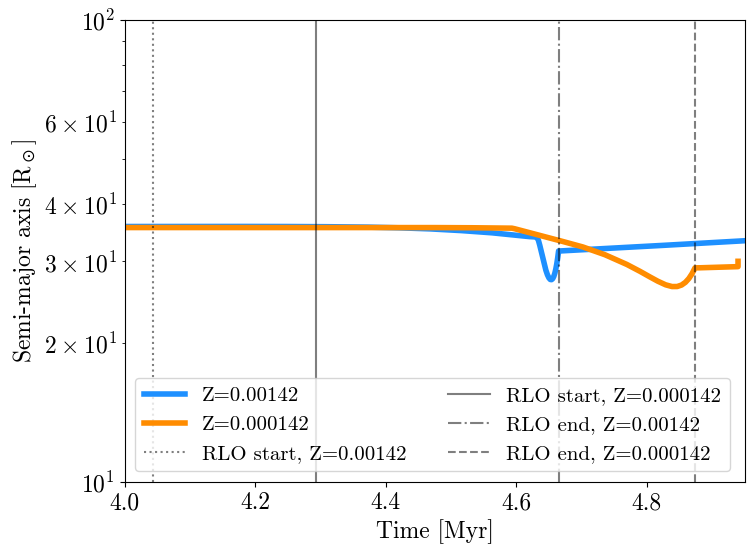

/tmp/ipykernel_112294/3471096177.py:362: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Mass_0'], color='dodgerblue', lw=4, label=f'Star, {label}')


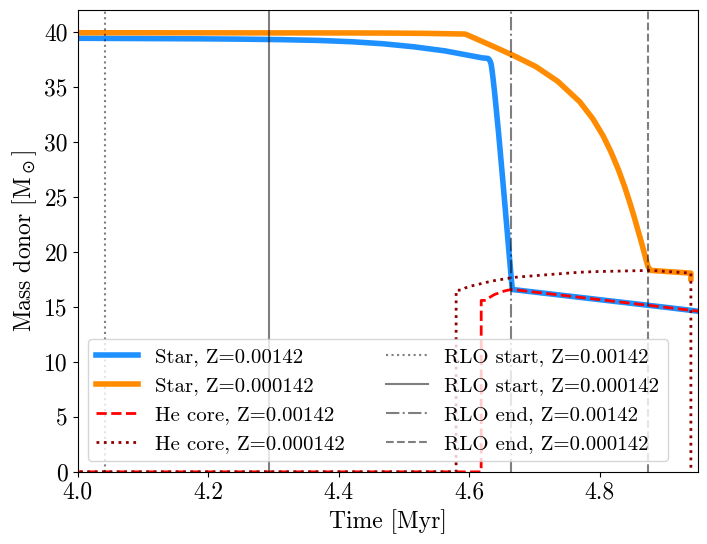

/tmp/ipykernel_112294/3471096177.py:396: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Radius_0'], color='dodgerblue', lw=4, label=f'Star, {label}')


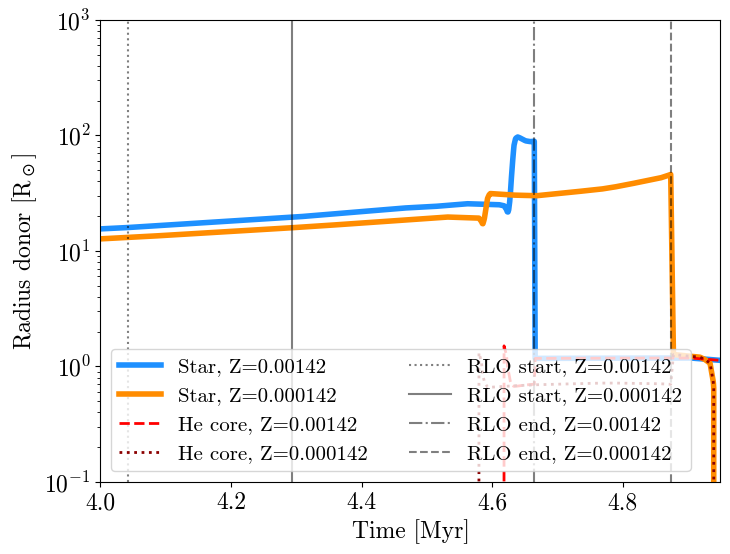

/tmp/ipykernel_112294/3471096177.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')


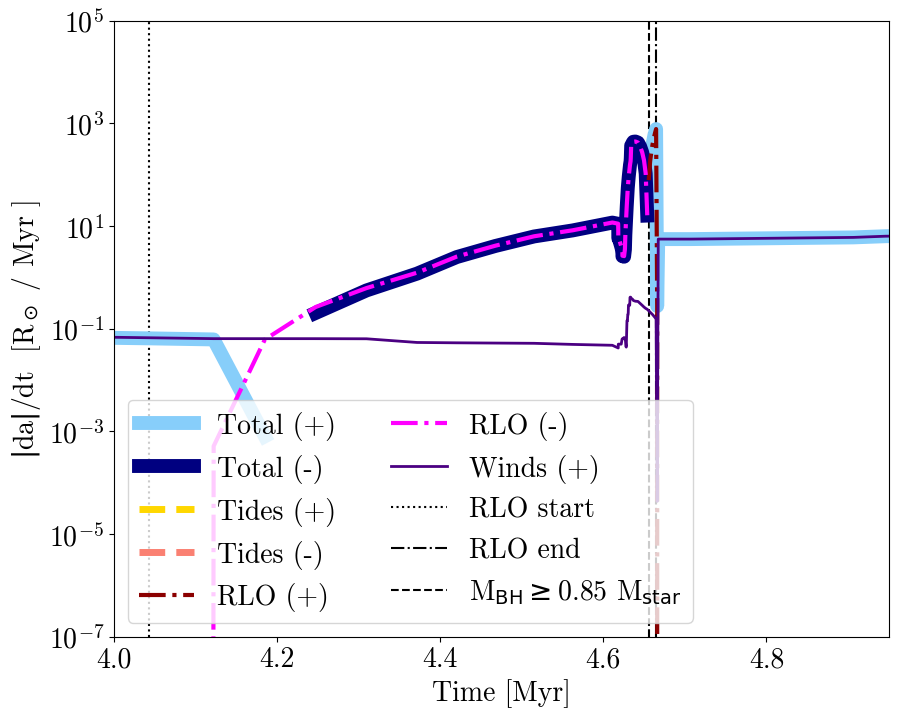

/tmp/ipykernel_112294/3471096177.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')


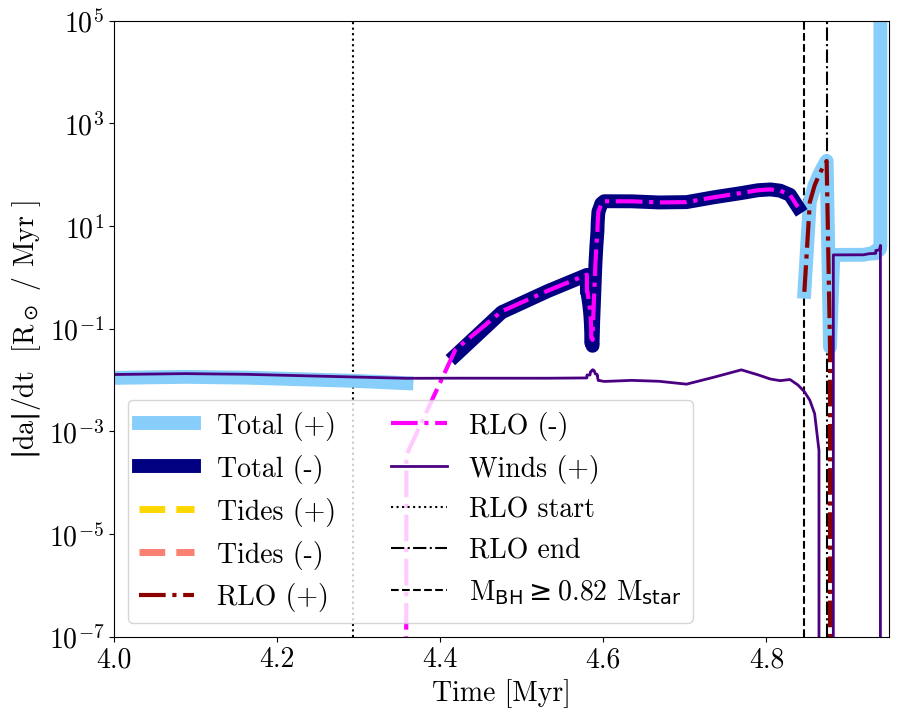

In [14]:
figa = semimajor_compare(dfP_isonotid_wind, dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=10,ymax=1e2, label='Z=0.00142', label2='Z=0.000142')
figM = mass_donor_compare(dfP_isonotid_wind, dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=0,ymax=42, label='Z=0.00142', label2='Z=0.000142')
figR = radius_donor_compare(dfP_isonotid_wind, dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=0.1,ymax=1e3, label='Z=0.00142', label2='Z=0.000142')
figdadt = dadt_contributions(dfP_isonotid_wind, xmin=4.0, xmax=4.95 , ymin=1e-7,ymax=1e5)
figdadt2 = dadt_contributions(dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=1e-7,ymax=1e5)

In [15]:
figa.savefig(f'{path_plots}/wind_a_evo.pdf',dpi=300)
figR.savefig(f'{path_plots}/wind_R_evo.pdf',dpi=300)

# Effect of ang mom alone isotropic vs gamma=1 in the no tides case at Z=0.000142

In [16]:
m1 = 40                 # Msun, donor mass
Z = 0.000142        # Z of donor
P = 10**(0.5)     
q = 0.8
pl.calc_a(P/365.25, m1, m1*q)

37.71799710766909

In [17]:
dfP_isonotid_windZlow, lPdic_isonotid_windZlow = pl.run_single(dict_notid_isotropic, m1=40, q=0.8, per=10**0.5,Zdonor=0.000142)
print(pl.find_status_single(dfP_isonotid_windZlow))

0


In [18]:
dfP_notid_windZlowgamma1, lPdic_notid_windZlowgamma1 = pl.run_single(dict_notid_circ100, m1=40, q=0.8, per=10**0.5,Zdonor=0.000142)
print(pl.find_status_single(dfP_notid_windZlowgamma1))

1


/tmp/ipykernel_112294/3471096177.py:330: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Semimajor'], color='dodgerblue', lw=4, label=label)


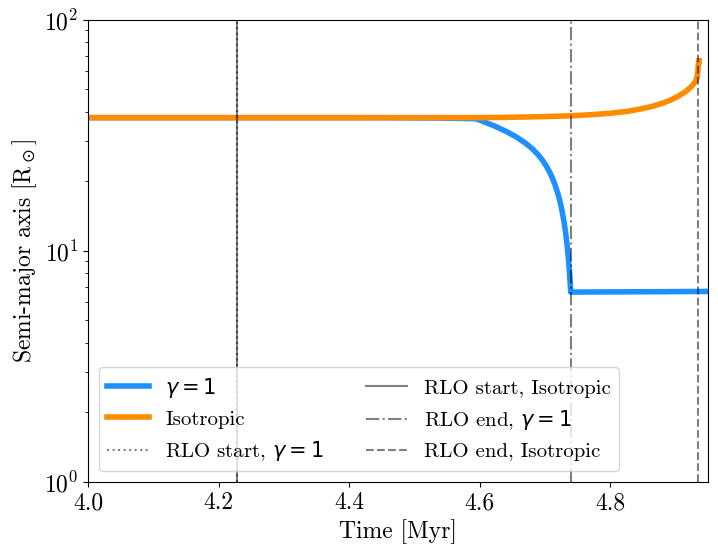

/tmp/ipykernel_112294/3471096177.py:362: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Mass_0'], color='dodgerblue', lw=4, label=f'Star, {label}')


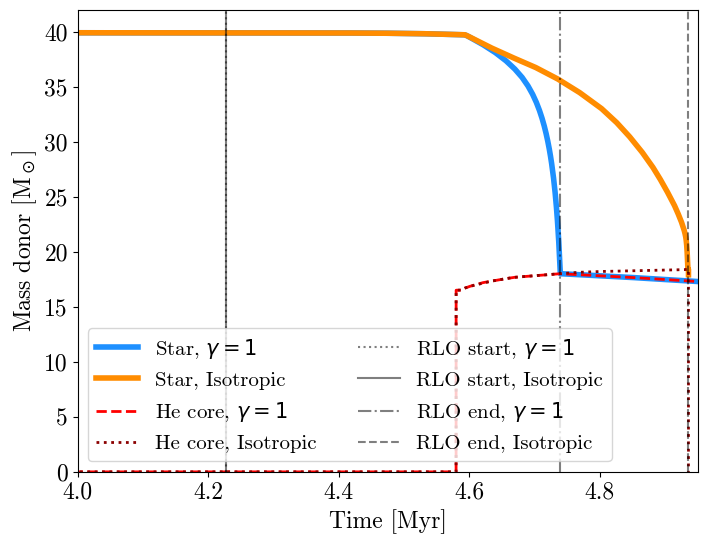

/tmp/ipykernel_112294/3471096177.py:396: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'],dfP['Radius_0'], color='dodgerblue', lw=4, label=f'Star, {label}')


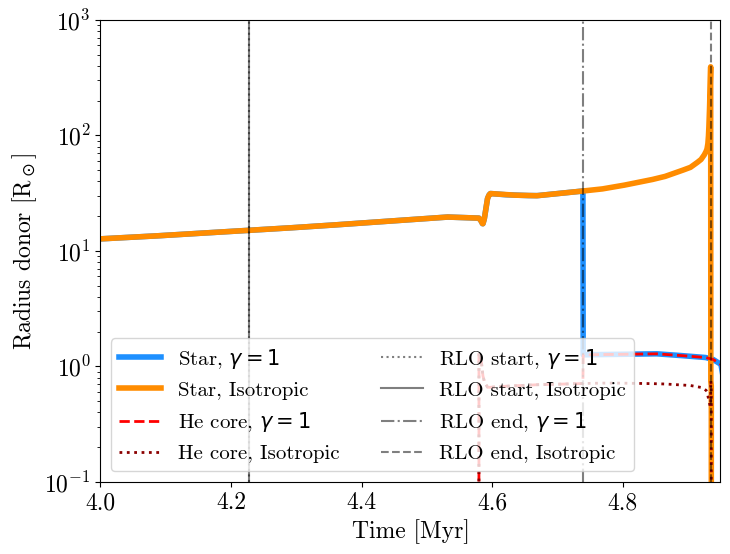

/tmp/ipykernel_112294/3471096177.py:57: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')


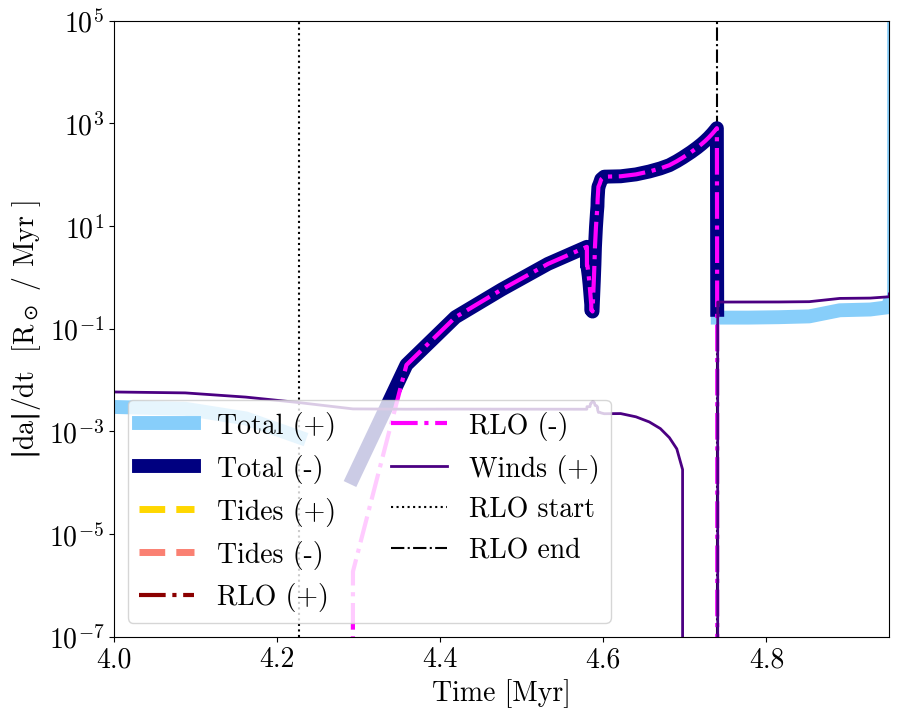

/tmp/ipykernel_112294/3471096177.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(dfP['Worldtime'], dfP['dSemimajordt'].mask(dfP['dSemimajordt'] < 0), lw=10, color='lightskyblue',  label=r'Total (+)')


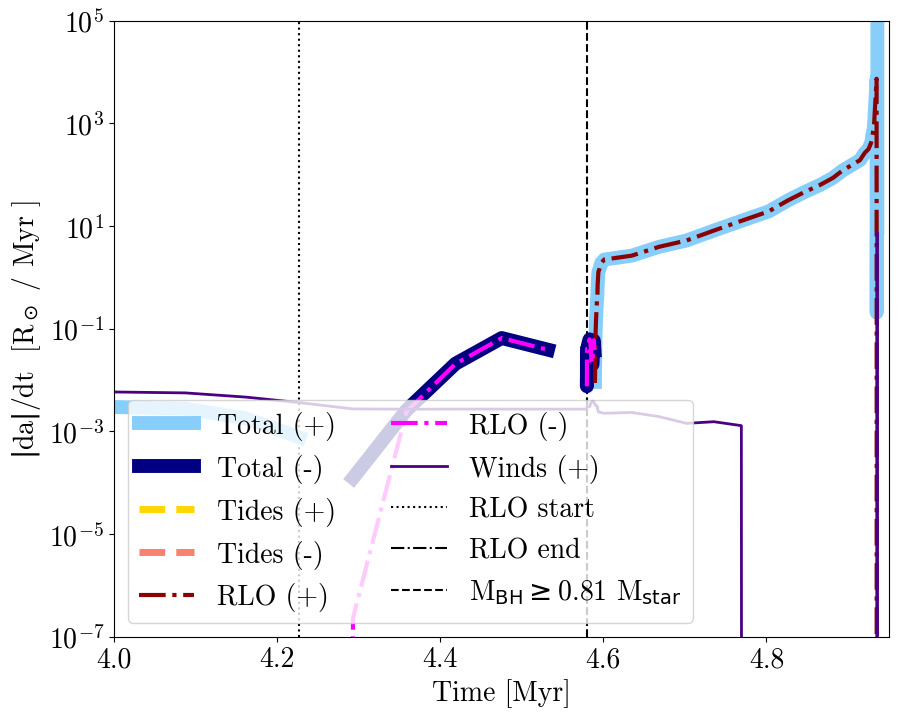

In [19]:
figa = semimajor_compare(dfP_notid_windZlowgamma1, dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=1,ymax=1e2, label=r'$\gamma=1$', label2='Isotropic')
figM = mass_donor_compare(dfP_notid_windZlowgamma1, dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=0,ymax=42, label=r'$\gamma=1$', label2='Isotropic')
figR = radius_donor_compare(dfP_notid_windZlowgamma1, dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=0.1,ymax=1e3, label=r'$\gamma=1$', label2='Isotropic')
figdadt = dadt_contributions_circ(dfP_notid_windZlowgamma1, xmin=4.0, xmax=4.95 , ymin=1e-7,ymax=1e5)
figdadt2 = dadt_contributions(dfP_isonotid_windZlow, xmin=4.0, xmax=4.95 , ymin=1e-7,ymax=1e5)